In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
print('No. of rows',df.shape[0])
print('No. of columns',df.shape[1])

No. of rows 13320
No. of columns 9


In [4]:
df.info()
#total_sqft is in object we need to convert it into integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [6]:
df.describe(include=object).T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
society,7818,2688,GrrvaGr,80
total_sqft,13320,2117,1200,843


## Treating column Data Types.

In [7]:
#Lets treat total_sqft first
for i in df['total_sqft']:
    if len(i)>7:
        print(i)

2100 - 2850
3010 - 3410
2957 - 3450
3067 - 8156
1042 - 1105
1145 - 1340
1015 - 1540
1520 - 1740
34.46Sq. Meter
1195 - 1440
1200 - 2400
4125Perch
1120 - 1145
4400 - 6640
3090 - 5002
4400 - 6800
1160 - 1195
1000Sq. Meter
4000 - 5249
1115 - 1130
1100Sq. Yards
520 - 645
1000 - 1285
3606 - 5091
650 - 665
633 - 666
5.31Acres
1445 - 1455
884 - 1116
850 - 1093
1440 - 1884
716Sq. Meter
547.34 - 827.31
580 - 650
3425 - 3435
1804 - 2273
3630 - 3800
660 - 670
4000 - 5249
1500Sq. Meter
620 - 933
142.61Sq. Meter
2695 - 2940
2000 - 5634
1574Sq. Yards
3450 - 3472
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
361.33Sq. Yards
645 - 936
2710 - 3360
2249.81 - 4112.19
3436 - 3643
2830 - 2882
596 - 804
1255 - 1863
1300 - 1405
1200 - 2400
1500 - 2400
117Sq. Yards
934 - 1437
980 - 1030
1564 - 1850
1446 - 1506
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
2806 - 3019
613 - 648
1430 - 1630
704 - 730
1482 - 1846
2805 - 3565
3293 - 5314
1210 - 1477
3369 - 3464
1125 - 1500
167Sq. Meter

In [8]:
df['total_sqft'] = df['total_sqft'].str.split(expand=True).loc[:,0]

In [9]:
for i in df['total_sqft']:
    if len(i)>7:
        print(i)
#Dropping these rows

34.46Sq.
4125Perch
5.31Acres
142.61Sq.
361.33Sq.
188.89Sq.
133.3Sq.
78.03Sq.
84.53Sq.
2.09Acres
24Guntha
142.61Sq.
1500Cents
1.26Acres
151.11Sq.
1Grounds
45.06Sq.
1.25Acres
86.72Sq.
38Guntha
142.84Sq.


In [10]:
df = df[df['total_sqft'].str.isnumeric()]

In [11]:
df['total_sqft'] = df['total_sqft'].astype(int)

In [12]:
#treatment of size column
df['size'] = df['size'].str.split(expand=True).loc[:,0]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13182 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13182 non-null  object 
 1   availability  13182 non-null  object 
 2   location      13181 non-null  object 
 3   size          13166 non-null  object 
 4   society       7724 non-null   object 
 5   total_sqft    13182 non-null  int32  
 6   bath          13111 non-null  float64
 7   balcony       12580 non-null  float64
 8   price         13182 non-null  float64
dtypes: float64(3), int32(1), object(5)
memory usage: 978.4+ KB


In [14]:
df['size'] = df['size'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13182 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13182 non-null  object 
 1   availability  13182 non-null  object 
 2   location      13181 non-null  object 
 3   size          13166 non-null  float64
 4   society       7724 non-null   object 
 5   total_sqft    13182 non-null  int32  
 6   bath          13111 non-null  float64
 7   balcony       12580 non-null  float64
 8   price         13182 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 978.4+ KB


In [16]:
df.isnull().sum()/len(df) * 100
#41% of records are missing in society column so we are dropping that column

area_type        0.000000
availability     0.000000
location         0.007586
size             0.121378
society         41.404946
total_sqft       0.000000
bath             0.538613
balcony          4.566834
price            0.000000
dtype: float64

In [17]:
del df['society']

In [18]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00


In [19]:
#Treating availability column
df['availability'].value_counts()

availability
Ready To Move           10488
18-Dec                    296
18-May                    294
18-Apr                    270
18-Aug                    199
19-Dec                    185
18-Jul                    141
18-Mar                    129
20-Dec                     98
18-Jun                     97
21-Dec                     93
19-Mar                     81
18-Feb                     62
18-Nov                     47
18-Jan                     41
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     38
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     20
22-Jun                     19
19-Sep                     19
19-Aug                     18
21-Jun                     17
Immediate Possession       16
20-Aug                     16
19-Apr                     16
19-Oct                     15
21-Mar                     14
17-Jun                     

In [20]:
df['availability'] = np.where(((df['availability']=='Ready To Move')|(df['availability']=='Immediate Possession')),'Ready To Move','Under Construction')

In [21]:
df['availability'].value_counts()

availability
Ready To Move         10504
Under Construction     2678
Name: count, dtype: int64

In [22]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00


## Univariate and Bivariate Analysis.

### Univariate Analysis

In [23]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [24]:
df.select_dtypes(include=np.number).columns
#numeric columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [25]:
df.select_dtypes(exclude=np.number).columns
#categorical data

Index(['area_type', 'availability', 'location'], dtype='object')

In [26]:
num_data = df[['size', 'total_sqft', 'bath', 'balcony', 'price']]
cat_data = df[['area_type', 'availability', 'location']]

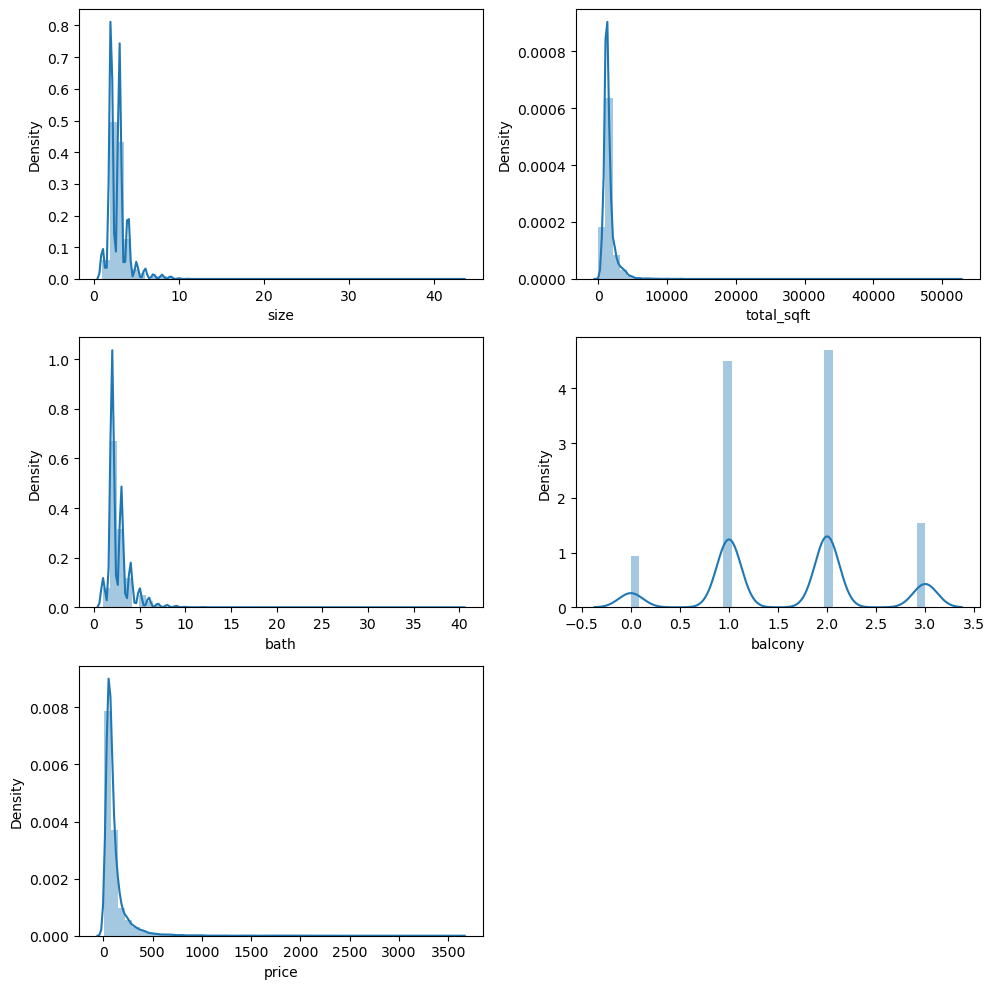

In [27]:
t = 1
plt.figure(figsize=(10,10))
for i in num_data:
    plt.subplot(3,2,t)
    sns.distplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

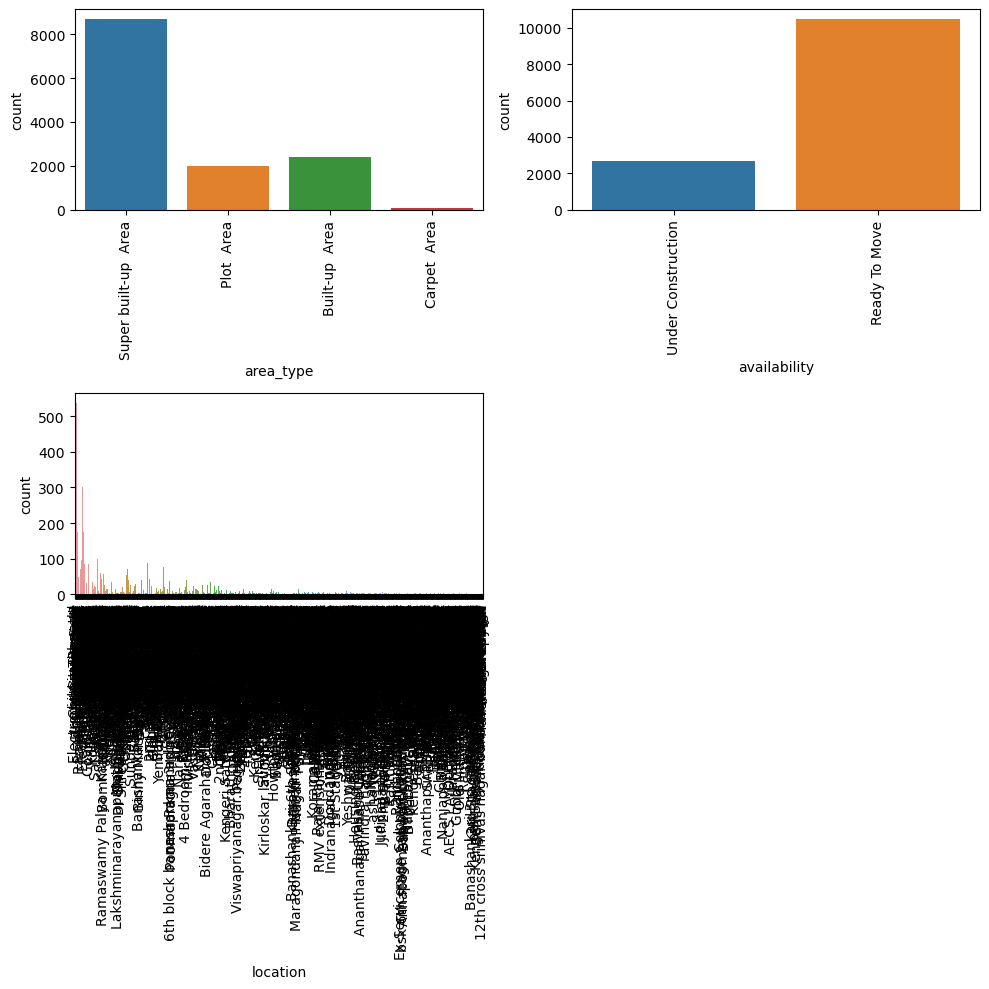

In [28]:
t = 1
plt.figure(figsize=(10,10))
for i in cat_data:
    plt.subplot(2,2,t)
    sns.countplot(x=df[i])
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
#Top 10 properties
top_10 = df.groupby(by='location')['price'].mean().sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Locations as per Property Price')

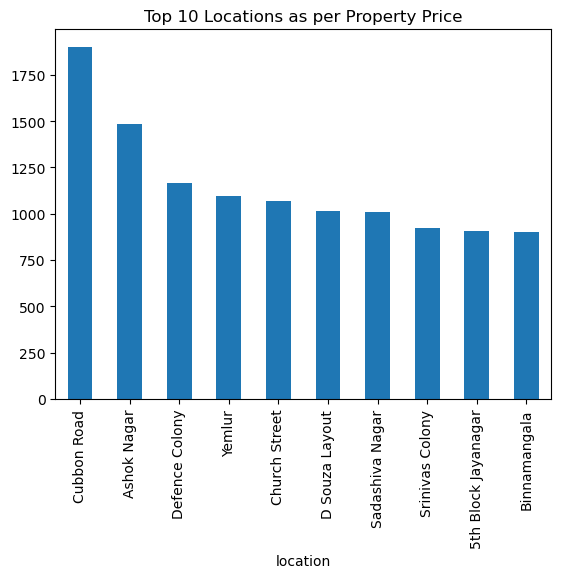

In [30]:
top_10.plot(kind='bar')
plt.title('Top 10 Locations as per Property Price')

### Bivariate Analysis.

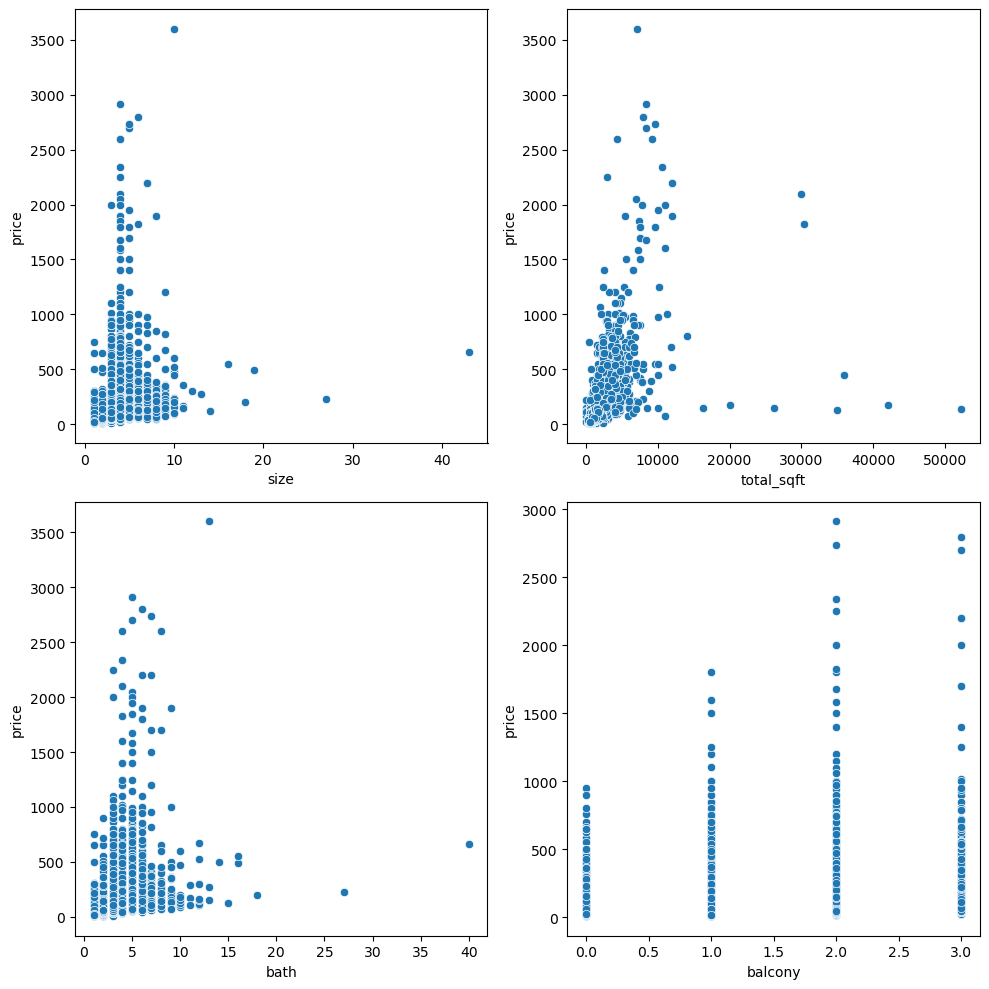

In [31]:
t = 1
plt.figure(figsize=(10,10))
for i in num_data.drop(columns='price'):
    plt.subplot(2,2,t)
    sns.scatterplot(x=df[i],y=df['price'])
    t+=1
plt.tight_layout()
plt.show()

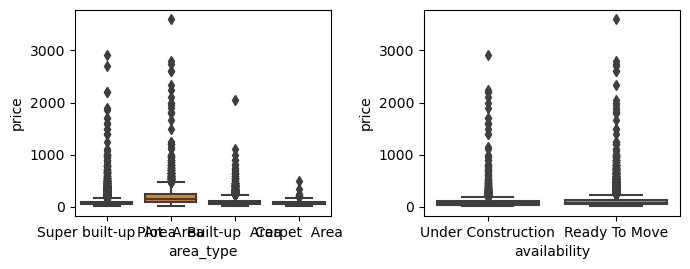

In [32]:
t = 1
plt.figure(figsize=(7,5))
for i in cat_data.drop(columns='location'):
    plt.subplot(2,2,t)
    sns.boxplot(x=df[i],y=df['price'])
    t+=1
plt.tight_layout()
plt.show()

<Axes: >

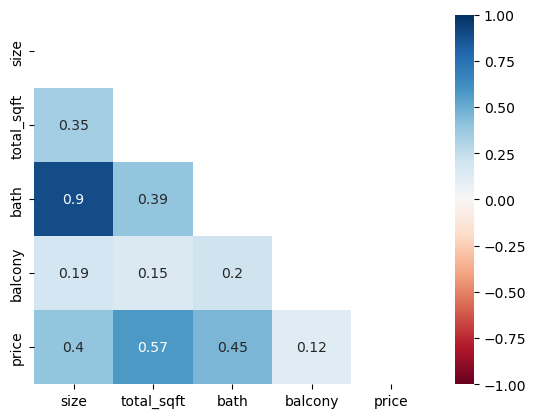

In [33]:
sns.heatmap(num_data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu',mask=np.triu(num_data.corr()))

## Data Preprocessing

In [34]:
#Treating null values

In [35]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)


balcony         4.566834
bath            0.538613
size            0.121378
location        0.007586
area_type       0.000000
availability    0.000000
total_sqft      0.000000
price           0.000000
dtype: float64

In [36]:
df['size'].fillna(df['size'].mode()[0],inplace=True)

In [37]:
df['size'].isnull().sum()

0

In [38]:
df.groupby(by='size')['bath'].median()

size
1.0      1.0
2.0      2.0
3.0      3.0
4.0      4.0
5.0      5.0
6.0      6.0
7.0      7.0
8.0      8.0
9.0      9.0
10.0    10.0
11.0    10.0
12.0     6.0
13.0    13.0
14.0    15.0
16.0    16.0
18.0    18.0
19.0    16.0
27.0    27.0
43.0    40.0
Name: bath, dtype: float64

In [39]:
df['size'][df['bath'].isnull()].unique()
#So only for size of 1 to 5 are null so we are replacing

array([4., 3., 1., 2., 5.])

In [40]:
for i in range(1,6):
    df['bath']=np.where(((df['bath'].isnull())&(df['size']==i)),i,df['bath'])

In [41]:
df['bath'].isnull().sum()

0

In [42]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00


In [43]:
df.groupby(by='size')['balcony'].median()

size
1.0     1.0
2.0     1.0
3.0     2.0
4.0     2.0
5.0     2.0
6.0     2.0
7.0     2.0
8.0     2.0
9.0     2.0
10.0    3.0
11.0    3.0
12.0    2.0
13.0    0.0
14.0    0.0
16.0    NaN
18.0    NaN
19.0    NaN
27.0    0.0
43.0    0.0
Name: balcony, dtype: float64

In [44]:
df['balcony'][df['balcony'].isnull()]=2
#Because most of the balcony was 2 in most sizes 

In [45]:
df['balcony'].isnull().sum()

0

In [46]:
df[df['location'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3.0,1600,3.0,2.0,86.0


In [47]:
df.drop(index=568,inplace=True)

In [48]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)


area_type       0.0
availability    0.0
location        0.0
size            0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
dtype: float64

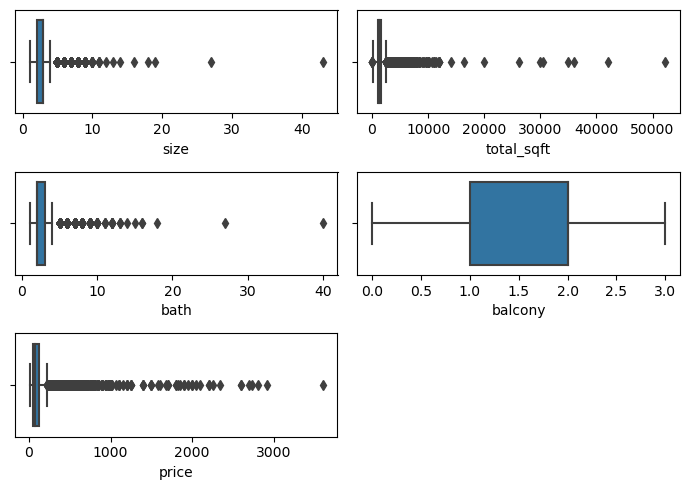

In [49]:
t = 1
plt.figure(figsize=(7,5))
for i in num_data:
    plt.subplot(3,2,t)
    sns.boxplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

In [50]:
num_data.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [51]:
#Lets drop the extreme values( values greter than 99th percentile)

outlier_cols = ['size', 'total_sqft', 'bath', 'price']
p_95 = df[outlier_cols].quantile(0.99)

In [52]:
p_95

size             8.0
total_sqft    5000.0
bath             8.0
price          660.0
Name: 0.99, dtype: float64

In [53]:
df = df[~(df[outlier_cols]>p_95).any(axis=1)]

In [54]:
df.shape


(12902, 8)

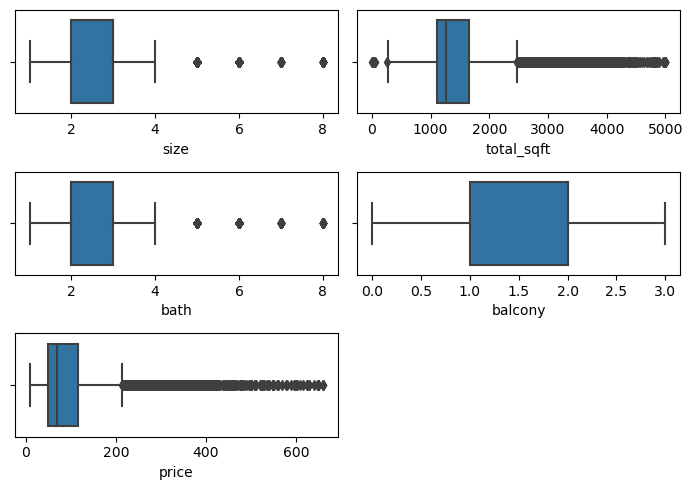

In [55]:
t = 1
plt.figure(figsize=(7,5))
for i in num_data:
    plt.subplot(3,2,t)
    sns.boxplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

# Encoding

In [56]:
(df['location'].value_counts(normalize=True) * 100).cumsum()

location
Whitefield                                              4.076887
Sarjapur  Road                                          7.107425
Electronic City                                         9.432646
Kanakpura Road                                         11.494342
Thanisandra                                            13.284762
Yelahanka                                              14.912417
Uttarahalli                                            16.338552
Marathahalli                                           17.694931
Hebbal                                                 19.043559
Raja Rajeshwari Nagar                                  20.345683
Hennur Road                                            21.508293
Bannerghatta Road                                      22.655402
7th Phase JP Nagar                                     23.794761
Haralur Road                                           24.895365
Electronic City Phase II                               25.910712
Rajaji Nagar    

In [57]:
top_10 = df.groupby(by='location')['price'].mean().sort_values(ascending=False).head(10)
top_10

location
6th block banashankari 3rd stage, 100 feet ORR    660.000000
1A Block Koramangala                              650.000000
Indiranagar HAL 2nd Stage                         640.000000
Richmond Road                                     630.000000
Koramangala Industrial Layout                     600.000000
Sadashiva Nagar                                   554.166667
Rahat Bagh                                        550.000000
2nd Block Koramangala                             550.000000
Church Street                                     536.000000
Race Course Road                                  525.000000
Name: price, dtype: float64

In [58]:
top_10_index = top_10.index
top_10_index


Index(['6th block banashankari 3rd stage, 100 feet ORR',
       '1A Block Koramangala', 'Indiranagar HAL 2nd Stage', 'Richmond Road',
       'Koramangala Industrial Layout', 'Sadashiva Nagar', 'Rahat Bagh',
       '2nd Block Koramangala', 'Church Street', 'Race Course Road'],
      dtype='object', name='location')

In [59]:
def location(s):
    if s in top_10_index:
        return 1
    else:
        return 0

In [60]:
df['location'] = df['location'].apply(location)

In [62]:
df = pd.get_dummies(df,drop_first=True).replace({True:1,False:0})

In [63]:
df.head()

,location,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Under Construction
0,0,2.0,1056,2.0,1.0,39.07,0,0,1,1
1,0,4.0,2600,5.0,3.0,120.00,0,1,0,0
2,0,3.0,1440,2.0,3.0,62.00,0,0,0,0
3,0,3.0,1521,3.0,1.0,95.00,0,0,1,0
4,0,2.0,1200,2.0,1.0,51.00,0,0,1,0


# Predictive Modelling

In [64]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [65]:
def model_validation(xtrain,xtest,ytrain,ytest,model):
    global m
    m=model
    m.fit(xtrain,ytrain)

    print('Training Score')
    pred = m.predict(xtrain)
    print('r-squared:',r2_score(ytrain,pred))
    print('MSE:',mean_squared_error(ytrain,pred))
    print('RMSE:',(mean_squared_error(ytrain,pred))**0.5)
    print('MAPE:',mean_absolute_percentage_error(ytrain,pred))

    print('Test Score')
    pred = m.predict(xtest)
    print('r-squared:',r2_score(ytest,pred))
    print('MSE:',mean_squared_error(ytest,pred))
    print('RMSE:',(mean_squared_error(ytest,pred))**0.5)
    print('MAPE:',mean_absolute_percentage_error(ytest,pred))

In [66]:
X = df.drop(columns='price')
Y = df['price']
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=1)

### Linear Regression

In [68]:
model_validation(x_train,x_test,y_train,y_test,LinearRegression())

Training Score
r-squared: 0.6401256411326262
MSE: 2763.61140569108
RMSE: 52.570061876424305
MAPE: 0.34799560032135896
Test Score
r-squared: 0.6570984039611394
MSE: 2521.676586915534
RMSE: 50.21629802081724
MAPE: 0.35317182771085953


In [69]:
m.coef_

array([ 2.90874716e+02, -2.85836275e+00,  8.12983808e-02,  1.13322040e+01,
       -9.02967738e-01,  9.68752893e+00,  6.25343232e+01,  7.25915742e-01,
       -4.89353222e+00])

In [70]:
pd.DataFrame({'Features':X.columns,'Coeffients':m.coef_}).sort_values(by = 'Coeffients',ascending=False)

,Features,Coeffients
0,location,290.874716
6,area_type_Plot Area,62.534323
3,bath,11.332204
5,area_type_Carpet Area,9.687529
7,area_type_Super built-up Area,0.725916
2,total_sqft,0.081298
4,balcony,-0.902968
1,size,-2.858363
8,availability_Under Construction,-4.893532


### Lasso


In [71]:
model_validation(x_train,x_test,y_train,y_test,Lasso(alpha=0.005))

Training Score
r-squared: 0.6401221589459193
MSE: 2763.638146720727
RMSE: 52.57031621286605
MAPE: 0.3480221036313511
Test Score
r-squared: 0.6570158063757785
MSE: 2522.2840043190868
RMSE: 50.22234566723349
MAPE: 0.3532253773672941


In [72]:
pd.DataFrame({'Features':X.columns,'Coeffients':m.coef_}).sort_values(by = 'Coeffients',ascending=False)

,Features,Coeffients
0,location,286.849085
6,area_type_Plot Area,62.412977
3,bath,11.300077
5,area_type_Carpet Area,8.706874
7,area_type_Super built-up Area,0.625788
2,total_sqft,0.081317
4,balcony,-0.892730
1,size,-2.825661
8,availability_Under Construction,-4.848290


### Ridge

In [73]:
model_validation(x_train,x_test,y_train,y_test,Ridge(alpha=0.5))

Training Score
r-squared: 0.640106344828748
MSE: 2763.759589311756
RMSE: 52.57147124925986
MAPE: 0.3480651405683477
Test Score
r-squared: 0.6569110938033722
MSE: 2523.054053934612
RMSE: 50.23001148650687
MAPE: 0.3532364022734129


In [74]:
pd.DataFrame({'Features':X.columns,'Coeffients':m.coef_}).sort_values(by = 'Coeffients',ascending=False)

,Features,Coeffients
0,location,279.960559
6,area_type_Plot Area,62.500403
3,bath,11.329379
5,area_type_Carpet Area,9.573376
7,area_type_Super built-up Area,0.692447
2,total_sqft,0.081366
4,balcony,-0.908562
1,size,-2.866903
8,availability_Under Construction,-4.886538


### Elastic Net

In [75]:
model_validation(x_train,x_test,y_train,y_test,ElasticNet(alpha=0.01,l1_ratio=0.01))

Training Score
r-squared: 0.6287447424941098
MSE: 2851.009633737688
RMSE: 53.39484650916873
MAPE: 0.35010277604128337
Test Score
r-squared: 0.6430771942965184
MSE: 2624.787673419492
RMSE: 51.232681692641194
MAPE: 0.3542541000746027


In [76]:
pd.DataFrame({'Features':X.columns,'Coeffients':m.coef_}).sort_values(by = 'Coeffients',ascending=False)

,Features,Coeffients
6,area_type_Plot Area,54.920902
0,location,32.481411
3,bath,11.197655
5,area_type_Carpet Area,2.299586
2,total_sqft,0.082337
4,balcony,-1.216414
1,size,-2.165892
7,area_type_Super built-up Area,-2.377357
8,availability_Under Construction,-4.440404


### GridSearchCV

In [77]:
params={'alpha':[0.001,0.01,0.1,1,5,10,20,50,100],
       'l1_ratio':[0.01,0.1,0.15,0.2,0.25]}

In [78]:
gscv = GridSearchCV(estimator=ElasticNet(),
    param_grid = params,
    scoring='r2',cv=3,
    verbose=3)

In [79]:
gscv.fit(X,Y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END ........alpha=0.001, l1_ratio=0.01;, score=0.638 total time=   0.0s
[CV 2/3] END ........alpha=0.001, l1_ratio=0.01;, score=0.639 total time=   0.0s
[CV 3/3] END ........alpha=0.001, l1_ratio=0.01;, score=0.641 total time=   0.0s
[CV 1/3] END .........alpha=0.001, l1_ratio=0.1;, score=0.638 total time=   0.0s
[CV 2/3] END .........alpha=0.001, l1_ratio=0.1;, score=0.639 total time=   0.0s
[CV 3/3] END .........alpha=0.001, l1_ratio=0.1;, score=0.641 total time=   0.0s
[CV 1/3] END ........alpha=0.001, l1_ratio=0.15;, score=0.638 total time=   0.0s
[CV 2/3] END ........alpha=0.001, l1_ratio=0.15;, score=0.640 total time=   0.0s
[CV 3/3] END ........alpha=0.001, l1_ratio=0.15;, score=0.641 total time=   0.0s
[CV 1/3] END .........alpha=0.001, l1_ratio=0.2;, score=0.639 total time=   0.0s
[CV 2/3] END .........alpha=0.001, l1_ratio=0.2;, score=0.640 total time=   0.0s
[CV 3/3] END .........alpha=0.001, l1_ratio=0.2

[CV 3/3] END ...........alpha=50, l1_ratio=0.15;, score=0.543 total time=   0.0s
[CV 1/3] END ............alpha=50, l1_ratio=0.2;, score=0.554 total time=   0.0s
[CV 2/3] END ............alpha=50, l1_ratio=0.2;, score=0.536 total time=   0.0s
[CV 3/3] END ............alpha=50, l1_ratio=0.2;, score=0.543 total time=   0.0s
[CV 1/3] END ...........alpha=50, l1_ratio=0.25;, score=0.553 total time=   0.0s
[CV 2/3] END ...........alpha=50, l1_ratio=0.25;, score=0.535 total time=   0.0s
[CV 3/3] END ...........alpha=50, l1_ratio=0.25;, score=0.542 total time=   0.0s
[CV 1/3] END ..........alpha=100, l1_ratio=0.01;, score=0.554 total time=   0.0s
[CV 2/3] END ..........alpha=100, l1_ratio=0.01;, score=0.536 total time=   0.0s
[CV 3/3] END ..........alpha=100, l1_ratio=0.01;, score=0.543 total time=   0.0s
[CV 1/3] END ...........alpha=100, l1_ratio=0.1;, score=0.553 total time=   0.0s
[CV 2/3] END ...........alpha=100, l1_ratio=0.1;, score=0.535 total time=   0.0s
[CV 3/3] END ...........alph

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100],
                         'l1_ratio': [0.01, 0.1, 0.15, 0.2, 0.25]},
             scoring='r2', verbose=3)

In [80]:
gscv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.25}

In [81]:
gscv.best_score_

0.6401302304541833

In [82]:
model_validation(x_train,x_test,y_train,y_test,ElasticNet(**gscv.best_params_))

Training Score
r-squared: 0.6381767977428163
MSE: 2778.5773116726423
RMSE: 52.71221216826934
MAPE: 0.3488118056565113
Test Score
r-squared: 0.6535446208779516
MSE: 2547.8108822917366
RMSE: 50.47584454262986
MAPE: 0.3539404652165034


In [83]:
pd.DataFrame({'Features':X.columns,'Coeffients':m.coef_}).sort_values(by = 'Coeffients',ascending=False)

,Features,Coeffients
0,location,181.278603
6,area_type_Plot Area,61.945901
3,bath,11.300865
5,area_type_Carpet Area,8.137905
7,area_type_Super built-up Area,0.295739
2,total_sqft,0.081954
4,balcony,-0.964533
1,size,-2.912280
8,availability_Under Construction,-4.810945


# Feature Selection

## Sfs (Sequential Feature Selector)

In [84]:
forward_selector = sfs(estimator=LinearRegression(),
    k_features='best',
    forward=True,verbose=2)

In [85]:
forward_selector.fit(X,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2024-02-16 08:54:21] Features: 1/9 -- score: 0.5433326395869302[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2024-02-16 08:54:22] Features: 2/9 -- score: 0.6209658962168058[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2024-02-16 08:54:22] Features: 3/9 -- score: 0.6349710930713253[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 9),
                          scoring='r2', verbose=2)

In [86]:
k= forward_selector.k_feature_names_
k

('location',
 'size',
 'total_sqft',
 'bath',
 'balcony',
 'area_type_Carpet  Area',
 'area_type_Plot  Area',
 'area_type_Super built-up  Area',
 'availability_Under Construction')

In [87]:
forward_selector.k_score_

0.6426074401800657

## LinearRegression with best Feature

In [88]:
model_validation(x_train.loc[:,k],x_test.loc[:,k],y_train,y_test,LinearRegression())

Training Score
r-squared: 0.6401256411326262
MSE: 2763.61140569108
RMSE: 52.570061876424305
MAPE: 0.34799560032135896
Test Score
r-squared: 0.6570984039611394
MSE: 2521.676586915534
RMSE: 50.21629802081724
MAPE: 0.35317182771085953


* Task -improve the prediction of the model
* Try different approach in encodinh
* Try different techniques of missing value treatment
* Use some advance models for the prediction

In [89]:
model_validation(x_train,x_test,y_train,y_test,LinearRegression())

Training Score
r-squared: 0.6401256411326262
MSE: 2763.61140569108
RMSE: 52.570061876424305
MAPE: 0.34799560032135896
Test Score
r-squared: 0.6570984039611394
MSE: 2521.676586915534
RMSE: 50.21629802081724
MAPE: 0.35317182771085953


In [104]:
pd.DataFrame({'Features':X.columns,'Coeffients':m.coef_}).sort_values(by = 'Coeffients',ascending=False)

,Features,Coeffients
0,location,290.874716
6,area_type_Plot Area,62.534323
3,bath,11.332204
5,area_type_Carpet Area,9.687529
7,area_type_Super built-up Area,0.725916
2,total_sqft,0.081298
4,balcony,-0.902968
1,size,-2.858363
8,availability_Under Construction,-4.893532


In [98]:
(m.feature_names_in_)

array(['location', 'size', 'total_sqft', 'bath', 'balcony',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area',
       'availability_Under Construction'], dtype=object)

In [103]:
m.predict([[0,4,1700,2,2,1,0,1,1]])

array([104.40679092])

In [108]:
#Saving the trained model

In [105]:
import pickle

In [107]:
with open('Model_Linear_Regression.pkl','wb') as File:
    pickle.dump(m,File)
    
print('File has been saved')
#wb- write mode

File has been saved


In [110]:
df.head()

,location,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Under Construction
0,0,2.0,1056,2.0,1.0,39.07,0,0,1,1
1,0,4.0,2600,5.0,3.0,120.00,0,1,0,0
2,0,3.0,1440,2.0,3.0,62.00,0,0,0,0
3,0,3.0,1521,3.0,1.0,95.00,0,0,1,0
4,0,2.0,1200,2.0,1.0,51.00,0,0,1,0
